In [1]:
# Imports
import pandas as pd
import numpy as np # linear algebra
import matplotlib.pyplot as plt
import seaborn as sns
from imblearn.over_sampling import SMOTE
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.datasets import load_iris
from sklearn.cluster import KMeans

In [2]:
train_df = pd.read_csv('../Resources/scaled_train_data.csv')
train_df.head()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V22,V23,V24,V25,V26,V27,V28,Class,scaled_amount,scaled_time
0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,...,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,0,1.788346,-1.623936
1,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,...,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,0,-0.269786,-1.623936
2,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,...,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,0,4.996638,-1.623910
3,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,...,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,0,1.422468,-1.623910
4,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,...,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,0,0.672923,-1.623883


In [3]:
X = train_df.drop(columns=['Class'])
y = train_df['Class']

In [4]:
# Ensuring all data is numeric 
X = X.apply(pd.to_numeric, errors='coerce')
y = pd.to_numeric(y, errors='coerce')

In [5]:
# Drop rows with NaN values
df_cleaned = pd.concat([X, y], axis=1).dropna()
X = df_cleaned.drop(columns=['Class'])
y = df_cleaned['Class']

In [6]:
# Using train_test_split to split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [7]:
scaled_amount = train_df['scaled_amount']
scaled_time = train_df['scaled_time']
train_df.drop(['scaled_amount', 'scaled_time'], axis=1, inplace=True)
train_df.insert(28, 'scaled_amount', scaled_amount)
train_df.insert(29, 'scaled_time', scaled_time)
train_df.head()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V22,V23,V24,V25,V26,V27,V28,scaled_amount,scaled_time,Class
0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,...,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,1.788346,-1.623936,0
1,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,...,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,-0.269786,-1.623936,0
2,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,...,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,4.996638,-1.623910,0
3,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,...,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,1.422468,-1.623910,0
4,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,...,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,0.672923,-1.623883,0


In [8]:
# Apply SMOTE to balance the dataset
smote = SMOTE(random_state=42)
X_train_smote, y_train_smote = smote.fit_resample(X_train, y_train)

k: 1, Train/Test Score: 1.000/0.999
k: 3, Train/Test Score: 1.000/0.999
k: 5, Train/Test Score: 0.999/0.999
k: 7, Train/Test Score: 0.999/0.999
k: 9, Train/Test Score: 0.999/0.999
k: 11, Train/Test Score: 0.999/0.999
k: 13, Train/Test Score: 0.999/0.999
k: 15, Train/Test Score: 0.999/0.999
k: 17, Train/Test Score: 0.999/0.999
k: 19, Train/Test Score: 0.999/0.999


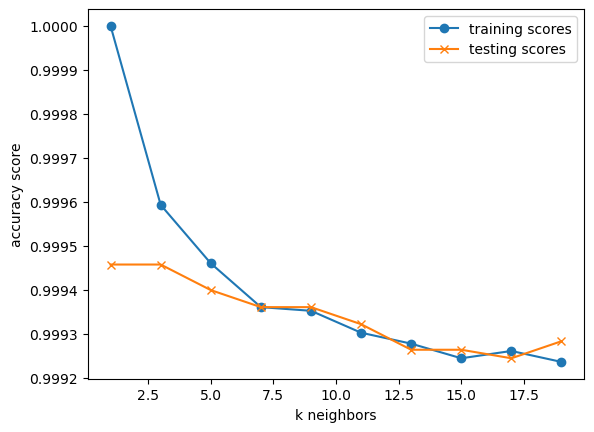

In [9]:
# Loop through different k values to find which has the highest accuracy.
# Note: We use only odd numbers because we don't want any ties.
train_scores = []
test_scores = []
for k in range(1, 20, 2):
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)
    train_score = knn.score(X_train, y_train)
    test_score = knn.score(X_test, y_test)
    train_scores.append(train_score)
    test_scores.append(test_score)
    print(f"k: {k}, Train/Test Score: {train_score:.3f}/{test_score:.3f}")
    
# Plot the results
plt.plot(range(1, 20, 2), train_scores, marker='o', label="training scores")
plt.plot(range(1, 20, 2), test_scores, marker="x", label="testing scores")
plt.xlabel("k neighbors")
plt.ylabel("accuracy score")
plt.legend()
plt.show()

In [10]:
# silhouette score
from sklearn.metrics import silhouette_score 
from sklearn.cluster import KMeans
sil_scores = [] 
k_range = range(2, 11) 
# Calculate silhouette score for each k
for k in k_range: 
    kmeans = KMeans(n_clusters=k, random_state=42) 
    kmeans.fit(X) 
    labels = kmeans.labels_ 
    sil_scores.append(silhouette_score(X, labels)) 
# Best k based on silhouette score 
best_k = k_range[np.argmax(sil_scores)]
print(f'Best k: {best_k}')

Best k: 2


In [30]:
from sklearn.metrics import classification_report

print(classification_report(y_test, y_pred))

NameError: name 'y_pred' is not defined